In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
print(list(train_df.columns.difference(test_df.columns)))

['SalePrice']


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Adding a target column "SalePrice" to the test_df and filling with a  placeholder value
test_df['SalePrice'] = -1

# Combining both dataframes
all_df = pd.concat([train_df, test_df], ignore_index=True)




In [7]:
all_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### To ensure that the merging of the shapes, column names, and data types of train_df and test_df match, and the columns are aligned as expected

In [8]:
# Check shapes of train_df and test_df
print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)

# Check column names in train_df and test_df
print("Columns in train_df:", train_df.columns)
print("Columns in test_df:", test_df.columns)

# Check data types of columns in train_df and test_df
print("Data types in train_df:\n", train_df.dtypes)
print("Data types in test_df:\n", test_df.dtypes)

# Check if column names match between train_df and test_df
columns_match = train_df.columns.equals(test_df.columns)
print("Column names match:", columns_match)


Shape of train_df: (1460, 81)
Shape of test_df: (1459, 81)
Columns in train_df: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFin

In [9]:
all_df.shape

(2919, 81)

In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Check for null values

In [11]:
null_counts = all_df.isnull().sum()
print(null_counts)


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [12]:
numerical_cols=all_df.select_dtypes(include=['float64','int64']).columns
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
cat_cols=all_df.select_dtypes(include=['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Handling missing data

In [14]:
#Handling categorical data
categorical_cols = all_df.select_dtypes(include=['object']).columns
all_df[categorical_cols]=all_df[categorical_cols].fillna(all_df[categorical_cols].mode().iloc[0])

In [15]:
#Handling numerical data
numerical_cols = all_df.select_dtypes(include=['int64', 'float64']).columns
all_df[numerical_cols] = all_df[numerical_cols].fillna(all_df[numerical_cols].mean())


### Dropping duplicates

In [16]:
# Drop duplicates
all_df.drop_duplicates(inplace=True)


In [17]:
all_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### Encoding Categorical Variables:

In [18]:
all_df=pd.get_dummies(all_df,columns=categorical_cols,drop_first=True)

### Feature Scaling/Normalization:

In [19]:
scaler=StandardScaler()
all_df[numerical_cols]=scaler.fit_transform(all_df[numerical_cols])
print(all_df)

            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.731458    0.067331    -0.202068 -0.217879     0.646183    -0.507284   
1    -1.730271   -0.873616     0.501870 -0.072044    -0.063185     2.188279   
2    -1.729084    0.067331    -0.061280  0.137197     0.646183    -0.507284   
3    -1.727897    0.302568    -0.436714 -0.078385     0.646183    -0.507284   
4    -1.726711    0.067331     0.689587  0.518903     1.355551    -0.507284   
...        ...         ...          ...       ...          ...          ...   
2914  1.726711    2.419700    -2.266952 -1.043937    -1.481920     1.289758   
2915  1.727897    2.419700    -2.266952 -1.049263    -1.481920    -0.507284   
2916  1.729084   -0.873616     4.256207  1.246808    -0.772552     1.289758   
2917  1.730271    0.655424    -0.342855  0.034605    -0.772552    -0.507284   
2918  1.731458    0.067331     0.220295 -0.068620     0.646183    -0.507284   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinS

C:\Users\HP\AppData\Local\Temp\ipykernel_1868\3318034193.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=train_df.corr()


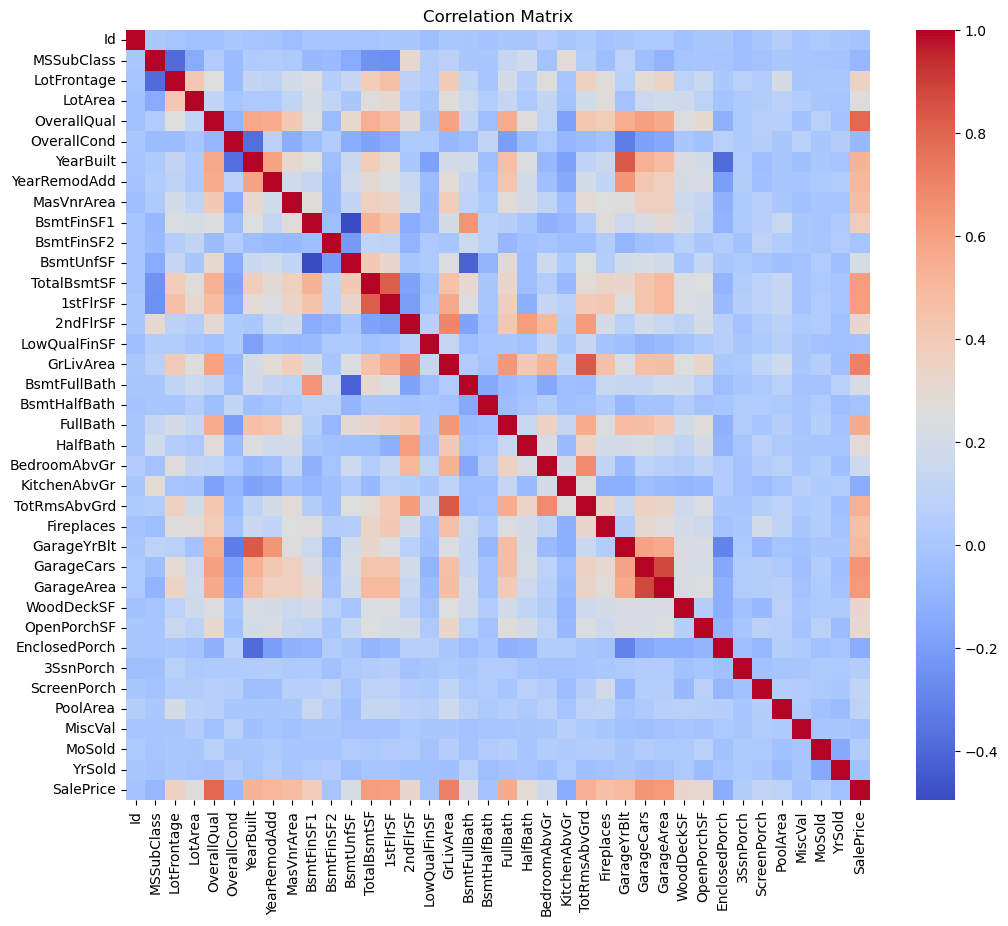

In [20]:
correlation_matrix=train_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=False,fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1868\3766712476.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_df.corr()


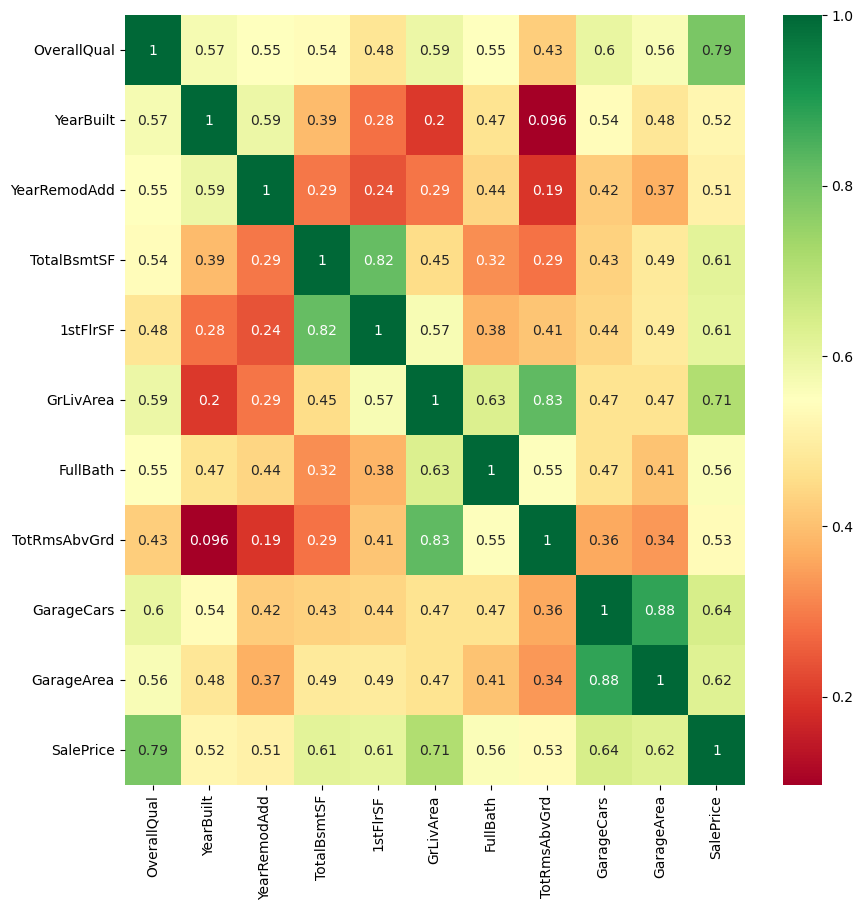

In [21]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

                 Id  SalePrice
Id         1.000000  -0.739839
SalePrice -0.739839   1.000000


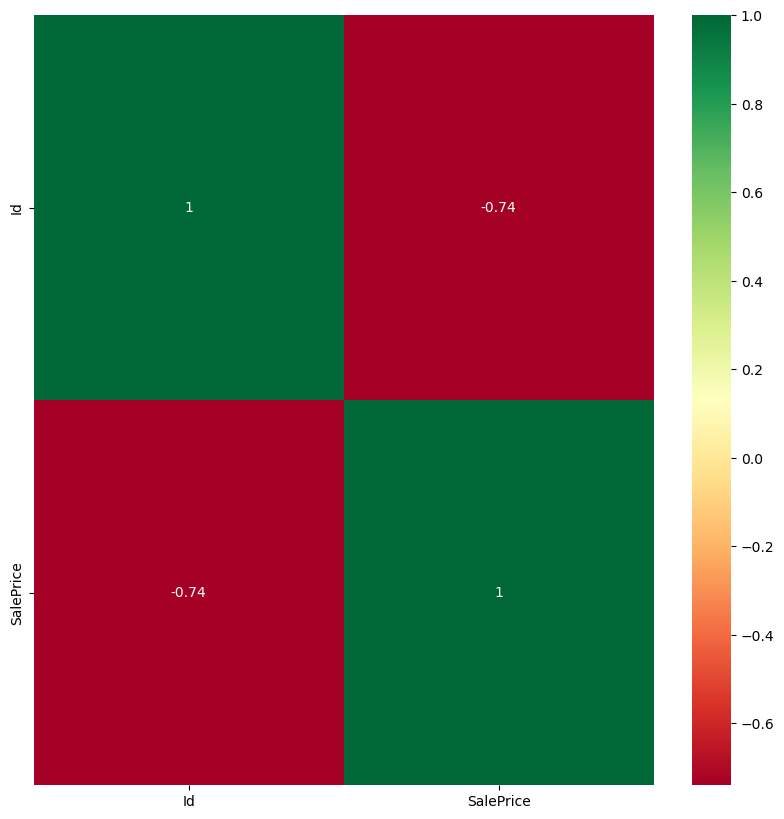

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix for the combined dataset
corrmat_all = all_df.corr()

# Identifing highly correlated features with the target variable from corrmat_all
top_corr_features = corrmat_all.index[abs(corrmat_all["SalePrice"]) > 0.5]

# Creating a subset of the correlation matrix for the top correlated features
corrmat_subset = corrmat_all.loc[top_corr_features, top_corr_features]
print(corrmat_subset)

plt.figure(figsize=(10, 10))
sns.heatmap(corrmat_subset, annot=True, cmap="RdYlGn")
plt.show()


In [23]:
dataset_df = all_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.067331,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.29313,...,0,0,0,0,1,0,0,0,1,0
1,-0.873616,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.29313,...,0,0,0,0,1,0,0,0,1,0
2,0.067331,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.29313,...,0,0,0,0,1,0,0,0,1,0


In [24]:
all_df.shape


(2919, 247)

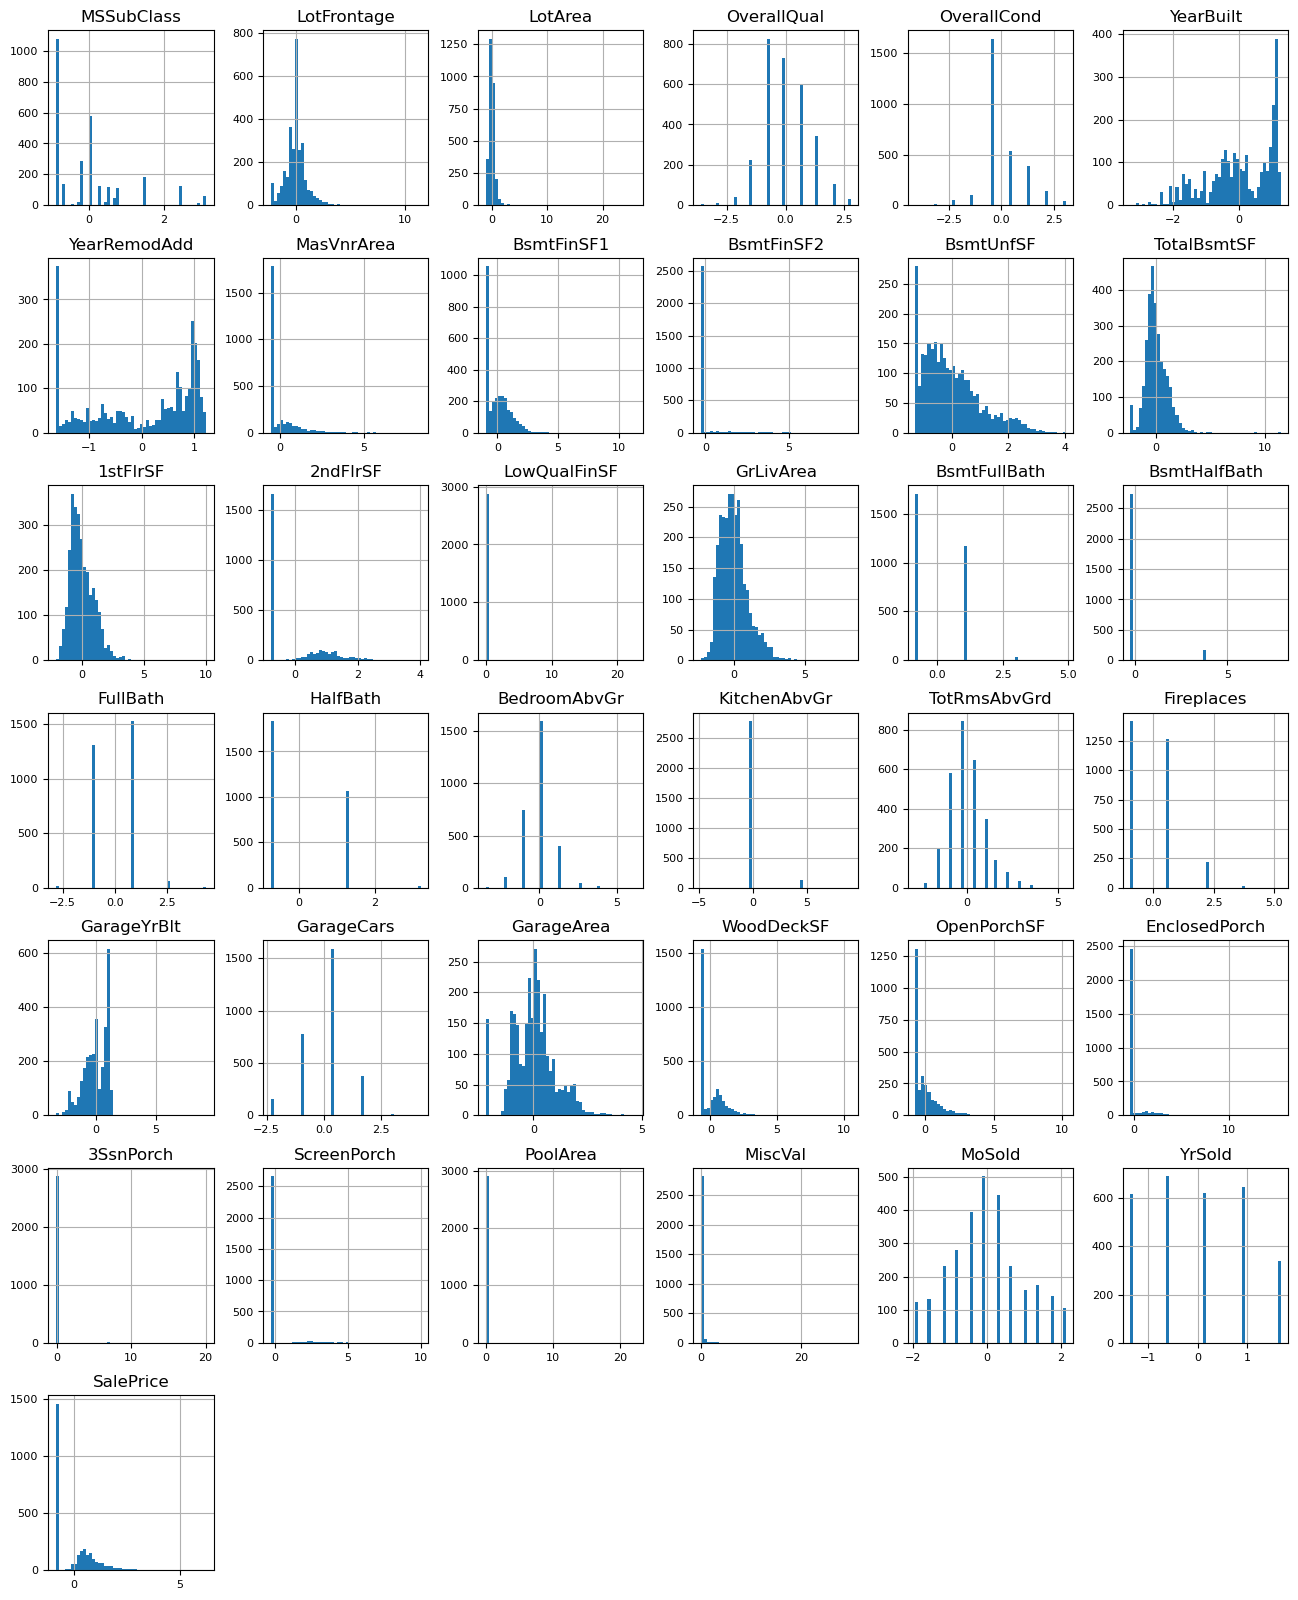

In [25]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [26]:
#Separating the feature and target variable
X=all_df.drop(['SalePrice'],axis=1)
y=all_df['SalePrice']

In [27]:
#Splitting the data into train and test model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
#Initialize the linear Regression model
model=LinearRegression()

In [29]:
#Fit the model on training data
model.fit(X_train,y_train)

LinearRegression()

In [30]:
#Predict on testing data
y_pred=model.predict(X_test)

In [31]:
#Calculate the mean-squared error and R-squared error

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [32]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2.2893970813311e+20
R-squared Score: -2.1424249185497062e+20
